# Indicator Prototypes

In [1]:
import yfinance as yf

from mplchart.utils import get_info
from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, OHLC, Volume


In [2]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2019-12-18 00:00:00-05:00 to 2024-12-18 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1259 non-null   float64
 1   High          1259 non-null   float64
 2   Low           1259 non-null   float64
 3   Close         1259 non-null   float64
 4   Volume        1259 non-null   int64  
 5   Dividends     1259 non-null   float64
 6   Stock Splits  1259 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.7 KB


In [ ]:
from mplchart import library
from mplchart.model import Indicator
from mplchart.utils import make_info, get_series

from dataclasses import dataclass, asdict

class RSI(Indicator):
    """Relative Strengh Index"""

    class Metadata:
        oversold = 30
        overbought = 70
        yticks = 30, 50, 70
        default_pane = "above"

    def __init__(self, period: int = 14):
        self.period = period

    def __call__(self, prices):
        series = get_series(prices)
        return library.calc_rsi(series, self.period)



class RSI(Indicator):
    """Relative Strengh Index"""

    class Info:
        oversold = 30,
        overbought = 70,
        yticks = (30, 50, 70),
        default_pane = "above"

    def __init__(self, period: int = 14):
        self.period = period

    def __call__(self, prices):
        series = get_series(prices)
        return library.calc_rsi(series, self.period)
    


class RSI(Indicator):
    """Relative Strengh Index"""

    info = make_info(
        oversold = 30,
        overbought = 70,
        yticks = (30, 50, 70),
        default_pane = "above"
    )

    def __init__(self, period: int = 14):
        self.period = period

    def __call__(self, prices):
        series = get_series(prices)
        return library.calc_rsi(series, self.period)
    

class RSI(Indicator):
    """Relative Strengh Index"""

    default_pane = "above"
    overbought = 70
    oversold = 30
    yticks = (30, 50, 70)


    def __init__(self, period: int = 14):
        self.period = period

    def __call__(self, prices):
        series = get_series(prices)
        return library.calc_rsi(series, self.period)
    

@dataclass
class RSI(Indicator, default_pane="above", overbought=70, oversold=30, yticks=(30, 50, 70)):
    """Relative Strengh Index"""

    period: int = 14

    def __call__(self, prices):
        kwargs = asdict(self)
        item = kwargs.pop("item", None)
        series = get_series(prices, item)
        return library.calc_rsi(series, **kwargs)


class CalcIndicator(Indicator):
    def __init_subclass__(cls, func, **kwargs):
        super().__init_subclass__(**kwargs)
        cls.func = staticmethod(func)

    def __call__(self, prices):
        kwargs = asdict(self)
        item = kwargs.pop("item", None)
        series = get_series(prices, item)
        return self.func(series, **kwargs)
    

@dataclass
class RSI(CalcIndicator, func=library.calc_rsi, default_pane="above", overbought=70, oversold=30, yticks=(30, 50, 70)):
    """Relative Strengh Index"""

    period: int = 14


rsi = RSI()
get_info(rsi, "yticks")


(30, 50, 70)

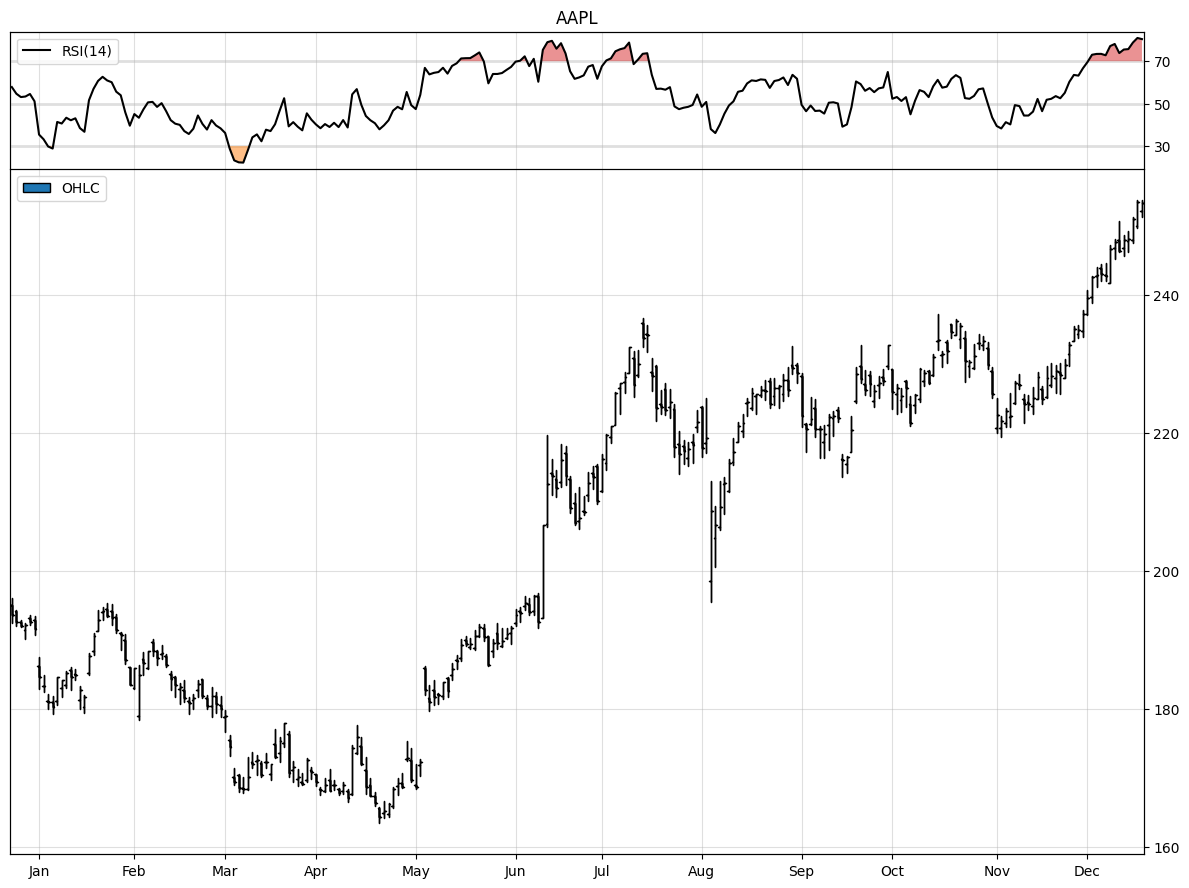

In [7]:
max_bars = 250

indicators = [
    OHLC(),
    RSI()
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)
